In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("clean_data.csv", index_col=0)
df

,appid,name,review_score,total_positive,total_negative,total_reviews,type,required_age,is_free,short_description,...,Online Co-op,Mods,Online PvP,Steam Achievements,PvP,Valve Anti-Cheat enabled,Downloadable Content,windows,mac,linux
0,1648390,ScooterFlow,8,446,21,467,game,0,False,The world’s most realistic freestyle scooter g...,...,0,0,0,0,0,0,0,1,0,0
1,1648610,Malum,6,146,53,199,game,0,False,Malum is the premier C-list horror game. Run f...,...,1,0,0,1,0,0,0,1,0,0
2,1647962,Hell Let Loose – Lethal Tide,8,70,6,76,dlc,0,False,Unlock access to the Lethal Tide DLC.,...,0,0,1,1,1,0,1,1,0,0
3,1647550,NEO: The World Ends with You,8,224,11,235,game,0,False,&quot;Only the possibility of you can change o...,...,0,0,0,1,0,0,0,1,0,0
4,1647730,Zool Redimensioned,8,68,2,70,game,0,False,The Ninja of the Nth Dimension is back! Explor...,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1239050,Mists of Aiden,8,362,38,400,game,0,False,Mists of Aiden is a first-person story driven ...,...,0,0,0,1,0,0,0,1,0,0
2517,418150,The Madness of Little Emma,6,68,20,88,game,0,False,The Madness of Little Emma is a difficult acti...,...,0,0,0,1,0,0,0,1,1,1
2518,9450,"Warhammer 40,000: Dawn of War - Soulstorm",9,5587,272,5859,game,16,False,The third and final expansion to the genre-def...,...,0,0,0,0,0,0,0,1,0,0
2519,1238840,Battlefield 1 ™,8,17459,2429,19888,game,16,False,Battlefield™ 1 takes you back to The Great War...,...,0,0,1,1,1,0,0,1,0,0


-112.08715243636942 1367.2963801127294


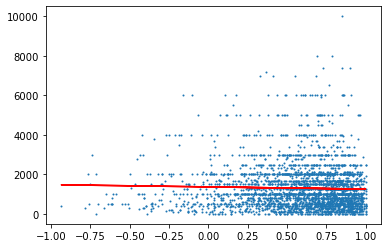

In [13]:
# calculate score
score = (df.total_positive - df.total_negative)/df.total_reviews

plt.scatter(score, df.price, s = 1)

# calculate linear regression
m, b = np.polyfit(score, df.price, 1)
print(m, b)

# regression line
plt.plot(score, m*score+b, color='red')

In [152]:
#df

# fitting linear regression with all variables

In [620]:
df.columns

Index(['appid', 'name', 'review_score', 'total_positive', 'total_negative',
       'total_reviews', 'type', 'required_age', 'is_free', 'short_description',
       'pc_requirements', 'mac_requirements', 'linux_requirements',
       'publishers', 'platforms', 'release_date', 'controller_support',
       'fullgame', 'price', 'Free to Play', 'Nudity', 'Simulation',
       'Sexual Content', 'Adventure', 'Early Access', 'Sports', 'Violent',
       'Casual', 'Gore', 'Massively Multiplayer', 'RPG', 'Racing', 'Indie',
       'Strategy', 'Action', 'Education', 'Full controller support',
       'Shared/Split Screen', 'VR Only', 'Shared/Split Screen Co-op',
       'Shared/Split Screen PvP', 'In-App Purchases', 'MMO', 'Multi-player',
       'VR Supported', 'Stats', 'Co-op', 'VR Support', 'Steam Leaderboards',
       'Remote Play Together', 'Cross-Platform Multiplayer', 'Single-player',
       'LAN Co-op', 'LAN PvP', 'Online Co-op', 'Mods', 'Online PvP',
       'Steam Achievements', 'PvP', 'Valve An

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [622]:
#poly = PolynomialFeatures(degree=1, include_bias=False)

In [623]:
#poly_features = poly.fit_transform(df.iloc[:,18:])

In [624]:
#X_train, X_test, y_train, y_test = train_test_split(poly_features,df["total_positive"]/df["total_reviews"] , test_size=0.3, random_state=42)

In [625]:
#poly_reg_model = LinearRegression()
#poly_reg_model.fit(X_train, y_train)

In [626]:
#poly_reg_y_predicted = poly_reg_model.predict(X_test)
#poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
#poly_reg_rmse

In [627]:
#X_train, X_test, y_train, y_test = train_test_split(poly_features,df["total_positive"]/df["total_reviews"] , test_size=0.3, random_state=42)

## linear regression with price variable

In [4]:
df["score"] = df["total_positive"]/df["total_reviews"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df["price"]).reshape(-1,1), df["score"], test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)


In [6]:
y_pred = reg.predict(X_test)
reg_rmse_full = np.sqrt(mean_squared_error(y_test, y_pred))
r2_full = r2_score(y_test, y_pred)

In [7]:
np.array(df["Casual"])

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
reg_rmse_full

0.14889401575173242

## try for Casual and Downloadable content

In [9]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df["Casual"]).reshape(-1,1), df["score"], test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)


In [10]:
y_pred = reg.predict(X_test)
reg_rmse_full2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_full = r2_score(y_test, y_pred)

In [11]:
reg_rmse_full2

0.1483968545961692

In [12]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df["Downloadable Content"]).reshape(-1,1), df["score"], test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)


In [13]:
y_pred = reg.predict(X_test)
reg_rmse_full2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_full = r2_score(y_test, y_pred)

In [14]:
reg_rmse_full2

0.1452644447883252

# error is smallest dof Downldoadable Contens as sole variable?

In [688]:
# keep if positive

In [19]:
import copy

In [20]:
"""def find_best_fit_maximize(df):
    #functions tries to slowly build up accuracy by adding variables in seeing wheter they add accuracy. Drop if not
    previous_good_regressors_indices = [18]
    good_regessor_indices = [18]
    previous_full = 0
    i=1
    reg_rmse_list = []
    while(good_regessor_indices[-1]<len(df.columns)):
        # consider changing random state later(other possible combination of best predictor variables)
        X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, good_regessor_indices],df["score"] , test_size=0.3, random_state=42)
        reg = LinearRegression().fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        reg_rmse_full = np.sqrt(mean_squared_error(y_test, y_pred))
        
        print("RMS difference: {}\n".format(reg_rmse_full - previous_full))
        if(reg_rmse_full - previous_full>0):
            
            previous_good_regressors_indices = copy.deepcopy(good_regessor_indices)
            previous_full = reg_rmse_full
            reg_rmse_list.append(reg_rmse_full)
            
            #try if next variable helps
        
            
            
        else:
            
            good_regessor_indices = copy.deepcopy(previous_good_regressors_indices)
        
        good_regessor_indices.append(18+i)
        try:
            print("Try these regressors next: {}".format(df.columns[good_regessor_indices]))
        except:
            pass
        
            
        i=i+1
        
    return reg_rmse_list,good_regessor_indices[:-1]
        
        
        
        
        
"""

In [53]:
#best_fit_indices_max = find_best_fit_maximize(df)

In [54]:
#best_fit_indices_max

In [68]:
def find_best_fit_minimize(df):
    #functions tries to slowly build up accuracy by adding variables in seeing wheter they add accuracy. Drop if not
    previous_good_regressors_indices = [18]
    good_regessor_indices = [18]
    previous_full = np.Inf
    i=1
    reg_rmse_list = []
    while(good_regessor_indices[-1]<len(df.columns)):
        # consider changing random state later(other possible combination of best predictor variables)
        X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, good_regessor_indices],df["score"] , test_size=0.3, random_state=42)
        reg = LinearRegression().fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        new_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        print("RMS difference: {}\n".format(reg_rmse_full - previous_full))
        
        # check if the error of the model with new variable added is smaller than previous error
        if(new_reg_rmse - previous_full<0):
            # if yes, keep variable in the model
            
            #update list of variables that improve prediction
            previous_good_regressors_indices = copy.deepcopy(good_regessor_indices)
            
            #update error s.t. it is error of new and improved model
            previous_full = new_reg_rmse
            
            # update histroy of MSE of helpful variables
            reg_rmse_list.append(new_reg_rmse)
            
            #try if next variable helps
        
            
            
        else:
            # if new variable does not decrease MSE, kick it out of the modek
            good_regessor_indices = copy.deepcopy(previous_good_regressors_indices)
        
        #add next variable to see if it improves performance
        good_regessor_indices.append(18+i)
        try:
            print("Try these regressors next: {}".format(df.columns[good_regessor_indices]))
        except:
            pass
        
            
        i=i+1
        
    return reg_rmse_list[:-1], previous_good_regressors_indices[:-1]
        
        
        
        
        


In [69]:
best_fit_indices_min = find_best_fit_minimize(df)

RMS difference: -inf

Try these regressors next: Index(['price', 'Free to Play'], dtype='object')
RMS difference: -0.007425123937266964

Try these regressors next: Index(['price', 'Nudity'], dtype='object')
RMS difference: -0.007425123937266964

Try these regressors next: Index(['price', 'Nudity', 'Simulation'], dtype='object')
RMS difference: -0.007420148182820913

Try these regressors next: Index(['price', 'Nudity', 'Simulation', 'Sexual Content'], dtype='object')
RMS difference: -0.007221464267188976

Try these regressors next: Index(['price', 'Nudity', 'Simulation', 'Sexual Content', 'Adventure'], dtype='object')
RMS difference: -0.00717220966994267

Try these regressors next: Index(['price', 'Nudity', 'Simulation', 'Sexual Content', 'Adventure',
       'Early Access'],
      dtype='object')
RMS difference: -0.007131088773451089

Try these regressors next: Index(['price', 'Nudity', 'Simulation', 'Sexual Content', 'Adventure',
       'Early Access', 'Sports'],
      dtype='object')


In [70]:
best_fit_indices_min

([0.14889401575173242,
  0.14888903999728637,
  0.14869035608165443,
  0.14864110148440812,
  0.14859998058791654,
  0.14847840291041514,
  0.14841978312501508,
  0.14838558208733038,
  0.14812869799243963,
  0.1480591481504827,
  0.14770270019931028,
  0.14748625242541996,
  0.1461359558172251,
  0.14501090399922736,
  0.14481977331895632,
  0.1442626044212684,
  0.14426229485039446,
  0.14420539910665844,
  0.14319936079553888,
  0.14318013206568836,
  0.14309189292039476,
  0.14307388443197033,
  0.1428812891314761,
  0.1424415580208679,
  0.14243480295231492,
  0.1422908728433311,
  0.14038435252131387,
  0.14022141986369419],
 [18,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  32,
  33,
  36,
  37,
  38,
  41,
  43,
  48,
  50,
  51,
  52,
  53,
  55,
  59,
  60,
  62])

In [71]:
#later check if price is actually a bad predictor.
# Add variable first which reduces error the most/maybe do this iteratively in a greedy appraoch?

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, best_fit_indices_min[1]],df["score"] , test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_rmse_t1 = np.sqrt(mean_squared_error(y_test, y_pred))

In [47]:
reg_rmse_t1 

0.14022141986369419

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, best_fit_indices_min[1][1:]],df["score"] , test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg_rmse_t2 = np.sqrt(mean_squared_error(y_test, y_pred))

In [51]:
reg_rmse_t2

0.1402467900699872

not considering price increases error rate slightly.

## variables for best fit with linar regression

In [693]:
# eventuell aus VR support eine zeile machen

In [56]:
df.columns[best_fit_indices_min[1]]

Index(['price', 'Nudity', 'Simulation', 'Sexual Content', 'Adventure',
       'Early Access', 'Sports', 'Violent', 'Casual', 'Gore',
       'Massively Multiplayer', 'RPG', 'Indie', 'Strategy',
       'Full controller support', 'Shared/Split Screen', 'VR Only',
       'In-App Purchases', 'Multi-player', 'Steam Leaderboards',
       'Cross-Platform Multiplayer', 'Single-player', 'LAN Co-op', 'LAN PvP',
       'Mods', 'Valve Anti-Cheat enabled', 'Downloadable Content', 'mac'],
      dtype='object')

## check which variable has biggest effect on MSE

## get error when all variables are included

In [72]:
#df.iloc[:,18:-1]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,18:-1], df["score"], test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)


In [74]:
y_pred = reg.predict(X_test)
reg_rmse_full = np.sqrt(mean_squared_error(y_test, y_pred))
r2_full = r2_score(y_test, y_pred)

In [75]:
reg_rmse_full

0.14146889181446545

### get all possible combinations where one variable is missing

In [76]:
column_indices = list(range(18,len(df.columns)))[:-1]

In [77]:
df.columns[column_indices]

Index(['price', 'Free to Play', 'Nudity', 'Simulation', 'Sexual Content',
       'Adventure', 'Early Access', 'Sports', 'Violent', 'Casual', 'Gore',
       'Massively Multiplayer', 'RPG', 'Racing', 'Indie', 'Strategy', 'Action',
       'Education', 'Full controller support', 'Shared/Split Screen',
       'VR Only', 'Shared/Split Screen Co-op', 'Shared/Split Screen PvP',
       'In-App Purchases', 'MMO', 'Multi-player', 'VR Supported', 'Stats',
       'Co-op', 'VR Support', 'Steam Leaderboards', 'Remote Play Together',
       'Cross-Platform Multiplayer', 'Single-player', 'LAN Co-op', 'LAN PvP',
       'Online Co-op', 'Mods', 'Online PvP', 'Steam Achievements', 'PvP',
       'Valve Anti-Cheat enabled', 'Downloadable Content', 'windows', 'mac',
       'linux'],
      dtype='object')

In [78]:
#column_indices

In [79]:
#list(range(18,len(df.columns)))

In [80]:
H = np.zeros((len(column_indices),len(column_indices)-1))

In [81]:
H.shape

(46, 45)

In [82]:
len(column_indices)

46

In [83]:
H[:] = np.array(range(18,len(df.columns)-1)).reshape(-1,1)

In [84]:
H = H.T

In [85]:
# create array of indices where always one variable is missing:
H = np.sort(H.reshape(46,45))

In [86]:
#df.columns[18:]

In [87]:
#for j in H:
#    print(j)

### perform regression for all combinations, find out for which variable the difference in MSE is biggest

In [88]:
Diff = np.ones(H.shape[0])
Diff_r2 = np.ones(H.shape[0])

In [95]:
max_differece = np.NINF
max_idx =0
min_difference = np.Inf
min_idx = 0
for idx, indices in enumerate(H):
    #print(np.setdiff1d(column_indices, H[idx][-1::-1]))
    #print(np.setdiff1d(column_indices, indices))
    # do linear regression
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,indices],df["total_positive"]/df["total_reviews"] , test_size=0.3, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    #r2 = r2_score(y_test, y_pred)
    var_idx = np.setdiff1d(column_indices, indices)[0]
    print("MSE: {}, name of missing variable: {}".format(reg_rmse, df.columns[var_idx]))
    #print(r2)
    
    # caclculate biggest difference in MSE of one missing variables compared to model with all variables.
    
    # calculate error of model with all variables - model with one missing variable
    Diff[idx] = reg_rmse_full- reg_rmse
    #Diff_r2[idx] = r2_full - r2
    
    #if error is positive, full model is worse than model with one variable removed.
    if Diff[idx] > max_differece:
        max_differece=Diff[idx]
        max_idx = var_idx
       
    
    # if error is negative, model with one variable removed is worse compared to full model
    if Diff[idx] < min_difference:
        min_difference=Diff[idx]
        min_idx = var_idx
        
        
    
    


MSE: 0.1414212943687221, name of missing variable: linux
MSE: 0.141506736042564, name of missing variable: mac
MSE: 0.14146889181446545, name of missing variable: windows
MSE: 0.1433334282224837, name of missing variable: Downloadable Content
MSE: 0.14161766557183628, name of missing variable: Valve Anti-Cheat enabled
MSE: 0.14158457309844982, name of missing variable: PvP
MSE: 0.14115130334310613, name of missing variable: Steam Achievements
MSE: 0.14145326332241048, name of missing variable: Online PvP
MSE: 0.1414748693526047, name of missing variable: Mods
MSE: 0.14135400795417852, name of missing variable: Online Co-op
MSE: 0.14221135882358604, name of missing variable: LAN PvP
MSE: 0.1414995128337999, name of missing variable: LAN Co-op
MSE: 0.1415235736296665, name of missing variable: Single-player
MSE: 0.14143547317110094, name of missing variable: Cross-Platform Multiplayer
MSE: 0.14139105431834556, name of missing variable: Remote Play Together
MSE: 0.14149385526033811, name 

## check this part again

In [96]:
max_differece

0.0004055435936218821

### turns out the categorical variable "Valve Anti cheat enabled" has BY FAR the biggest effect

In [97]:
min_difference

-0.001864536408018258

In [98]:
# max difference for Casual as price is already included?

In [99]:
df.columns[max_idx]

'Casual'

In [100]:
df.columns[min_idx]

'Downloadable Content'

## compare histograms conditioned on Valve Anti cheat

In [716]:
#df.loc[df['Valve Anti-Cheat enabled'] == 1]["score"]

Text(0.5, 1.0, 'Casual=0')

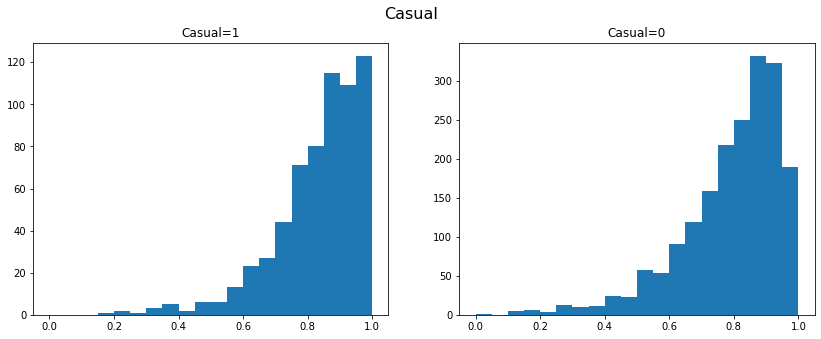

In [101]:
bins = np.linspace(0,1,21)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
fig.suptitle('Casual', fontsize=16)
ax1.hist(df.loc[df['Casual'] == 1]["score"],bins)
ax2.hist(df.loc[df['Casual'] == 0]["score"],bins)
ax1.set_title("Casual=1")
ax2.set_title("Casual=0")

Text(0.5, 1.0, 'Downloadable Content=0')

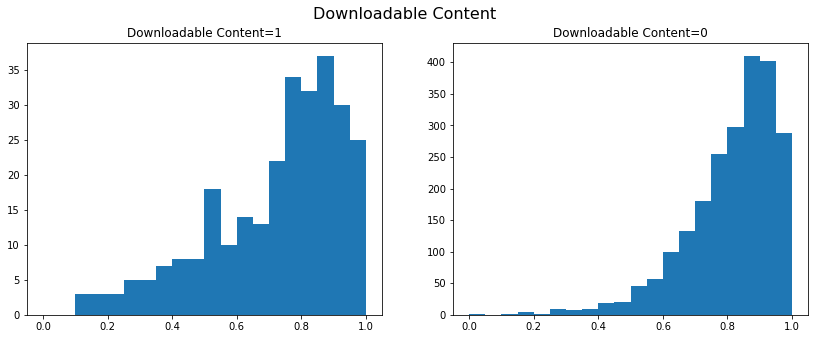

In [105]:
bins = np.linspace(0,1,21)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
fig.suptitle('Downloadable Content', fontsize=16)
ax1.hist(df.loc[df['Downloadable Content'] == 1]["score"],bins)
ax2.hist(df.loc[df['Downloadable Content'] == 0]["score"],bins)
ax1.set_title("Downloadable Content=1")
ax2.set_title("Downloadable Content=0")

# try comparing all histograms conditioned on all categorical variables:

C:\Users\Marco\AppData\Local\Temp/ipykernel_20708/1872369281.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))


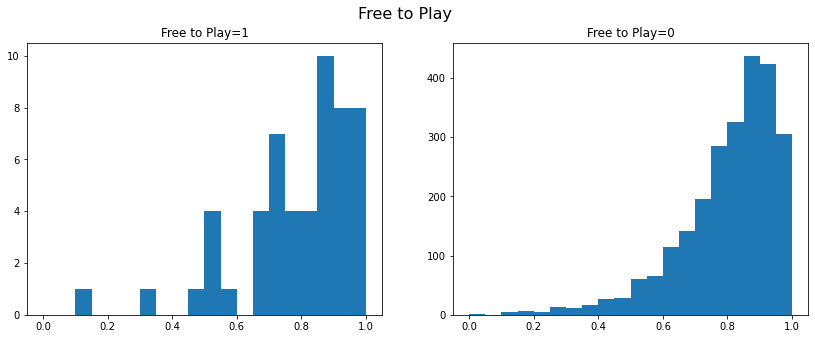

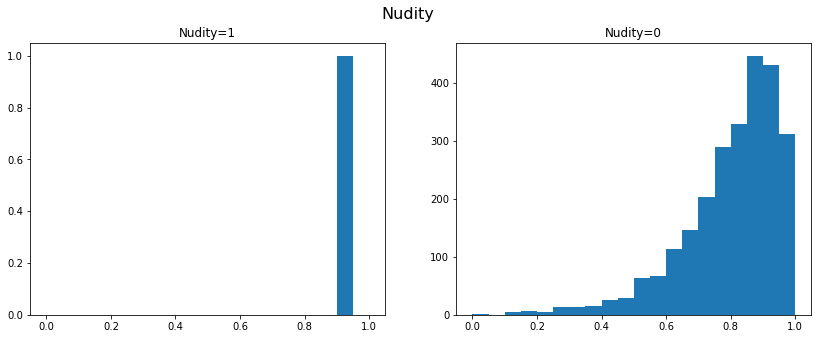

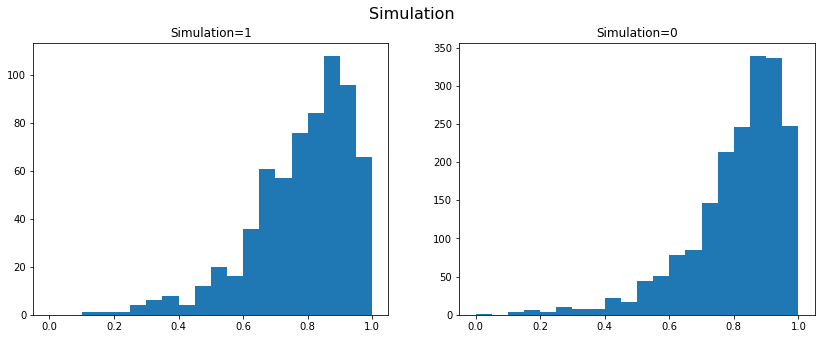

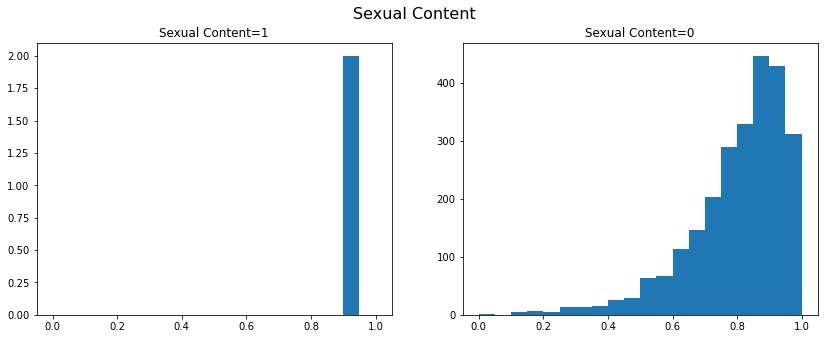

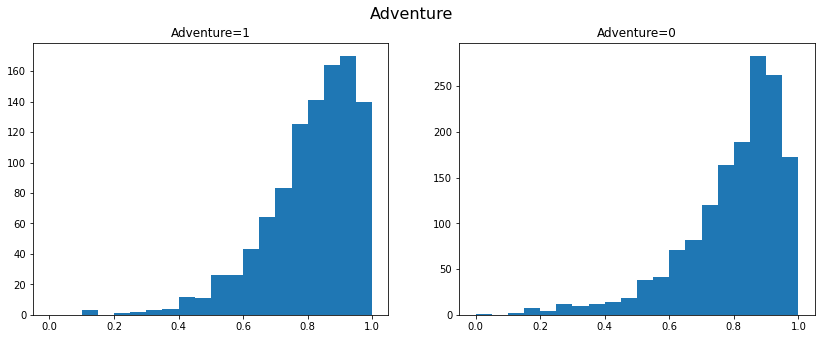

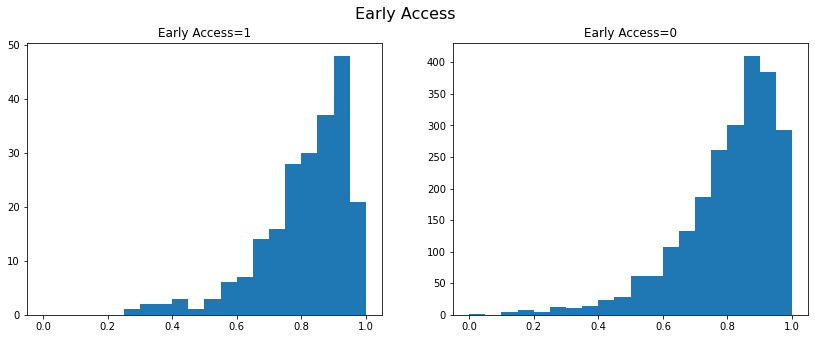

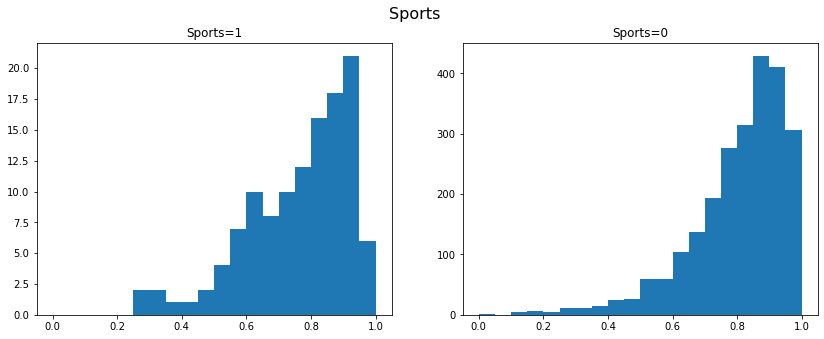

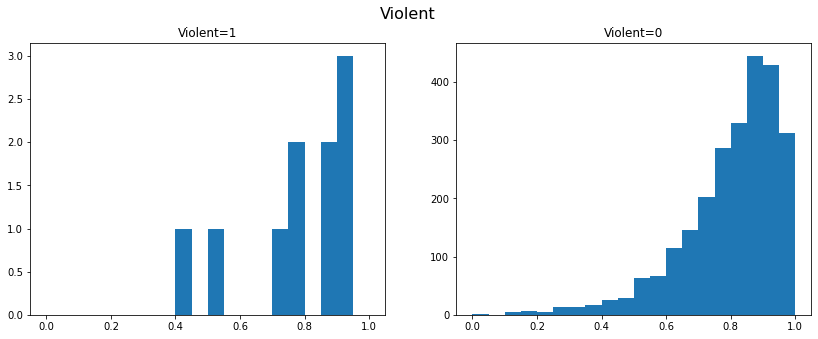

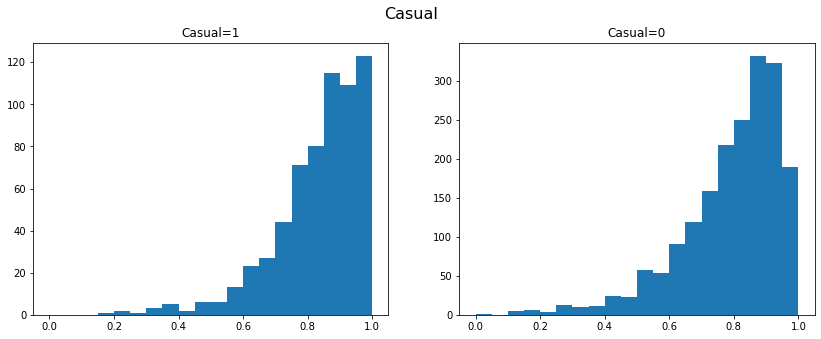

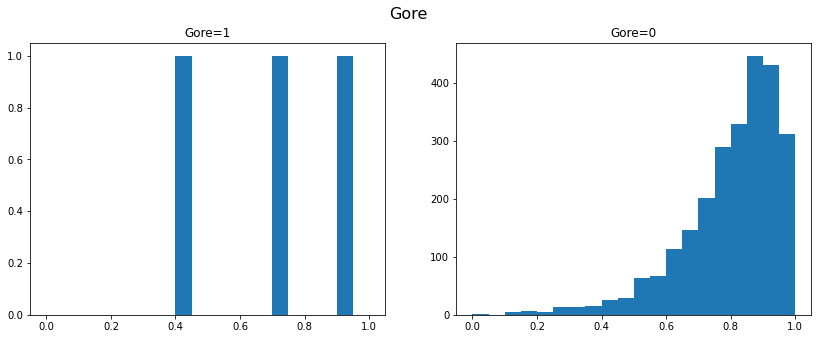

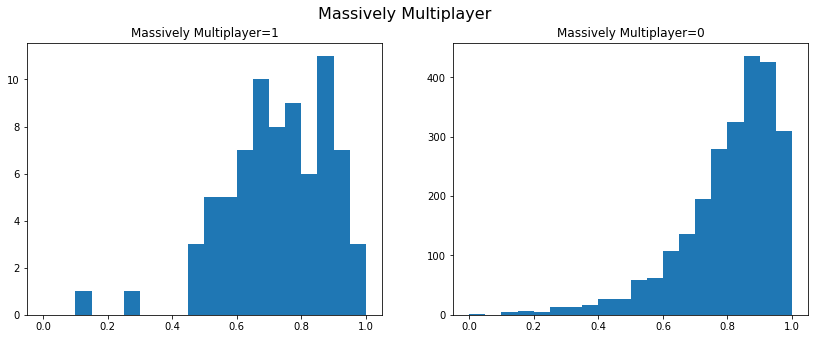

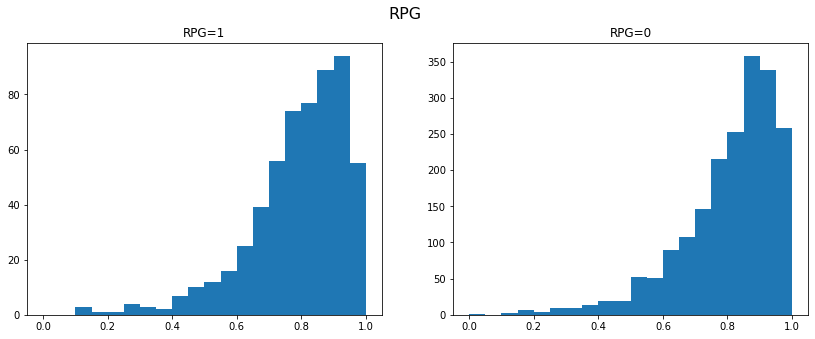

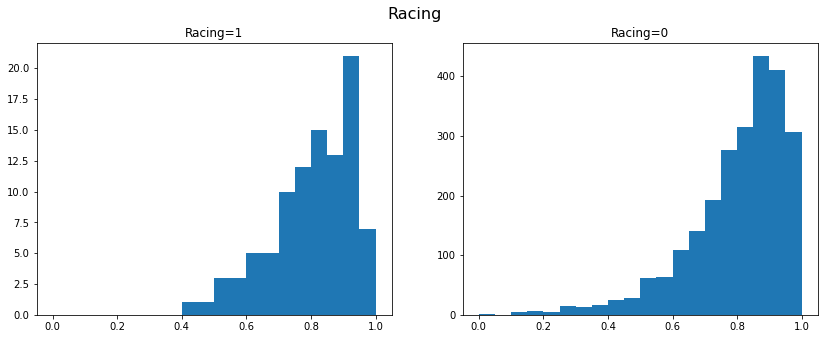

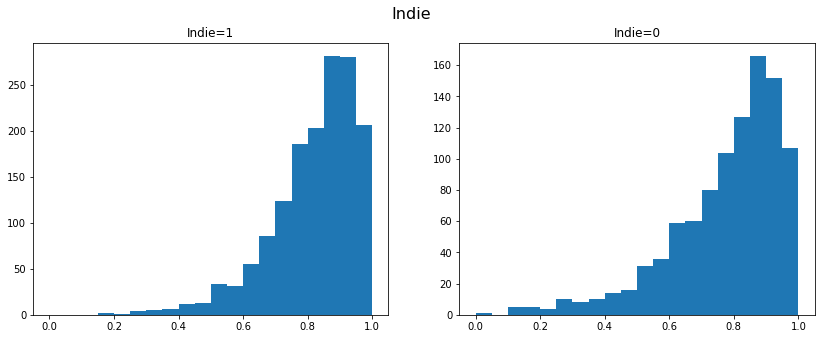

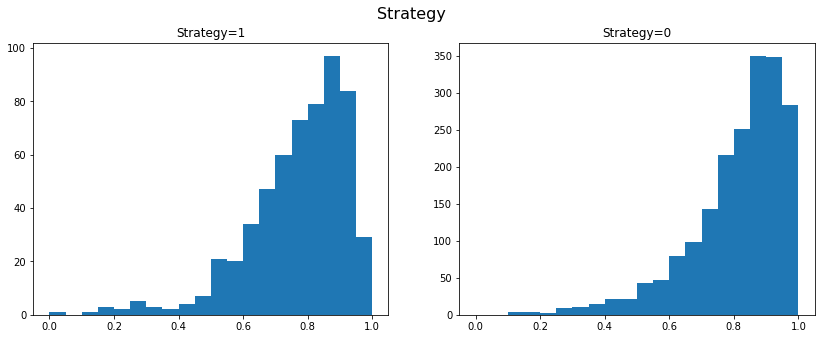

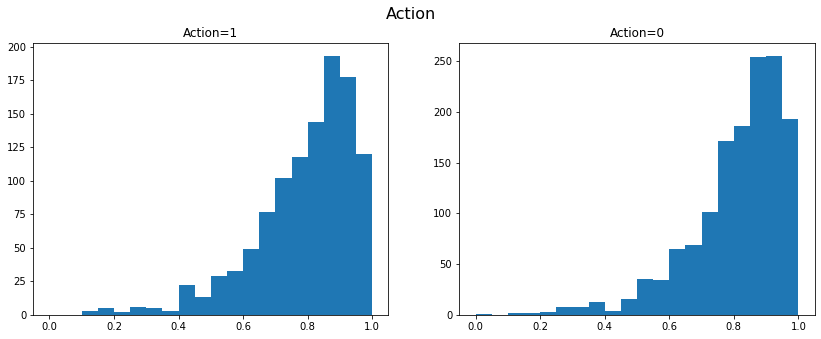

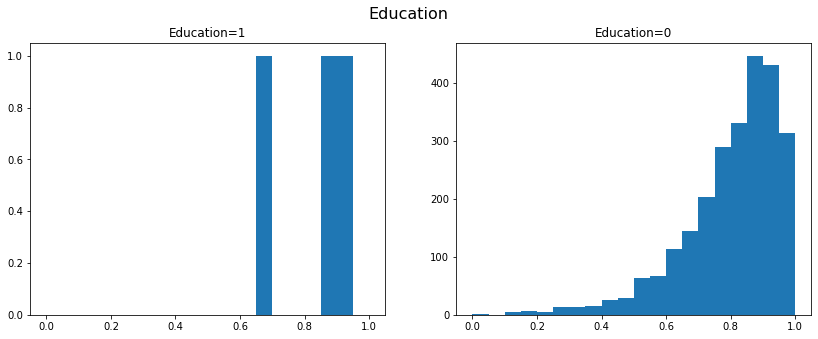

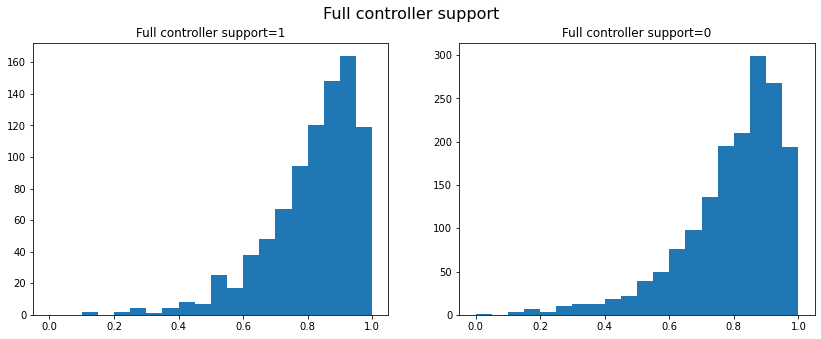

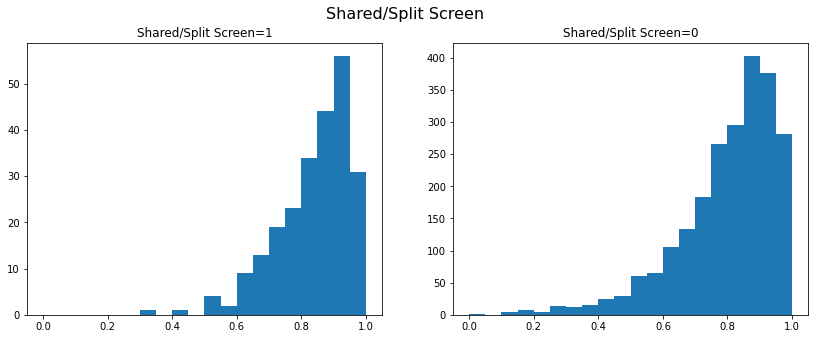

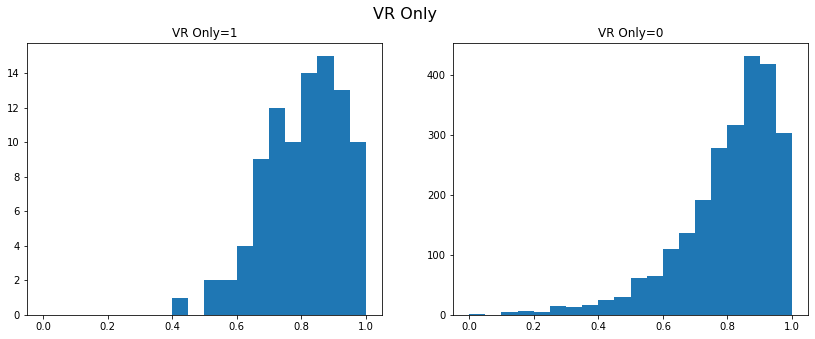

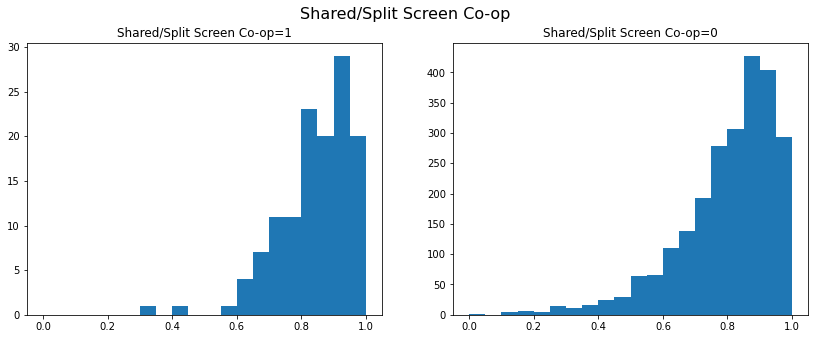

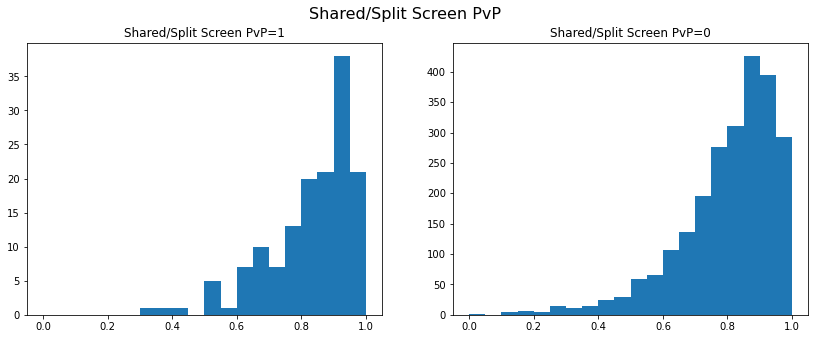

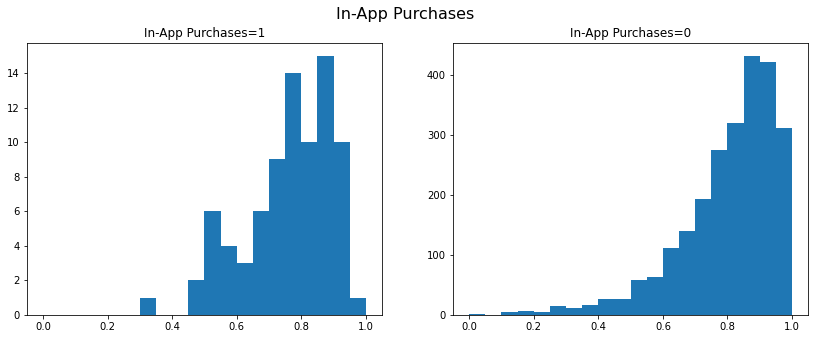

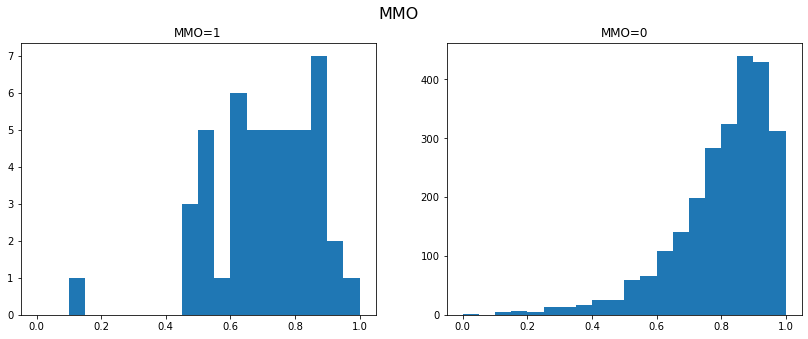

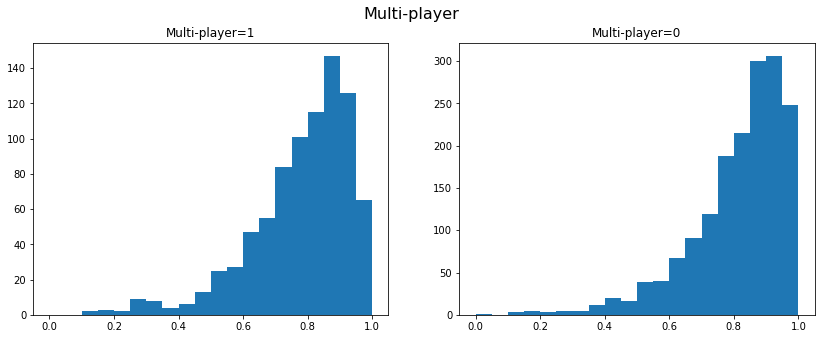

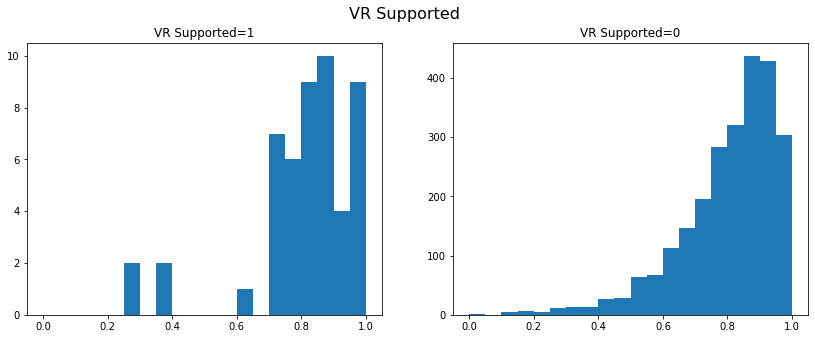

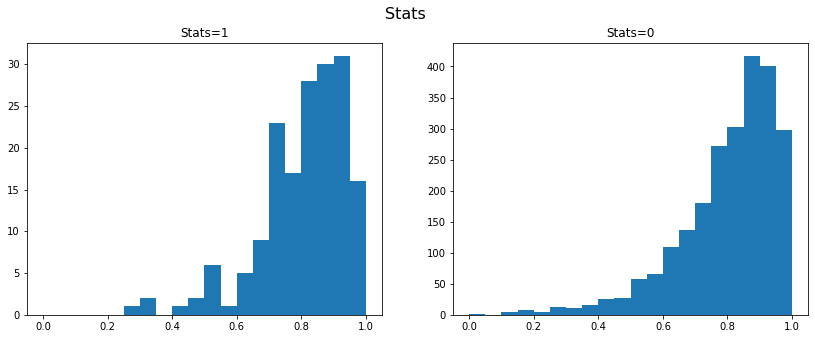

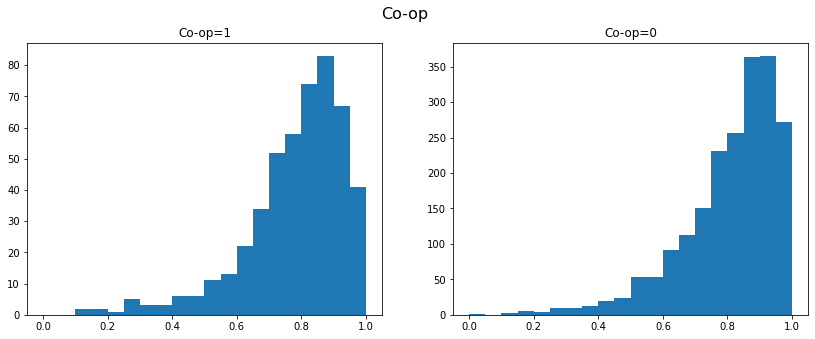

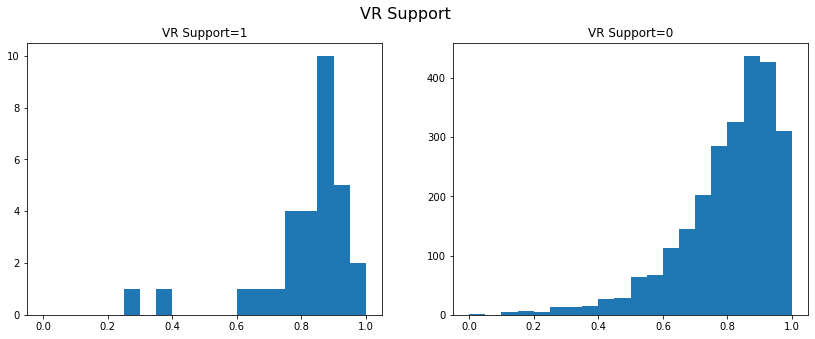

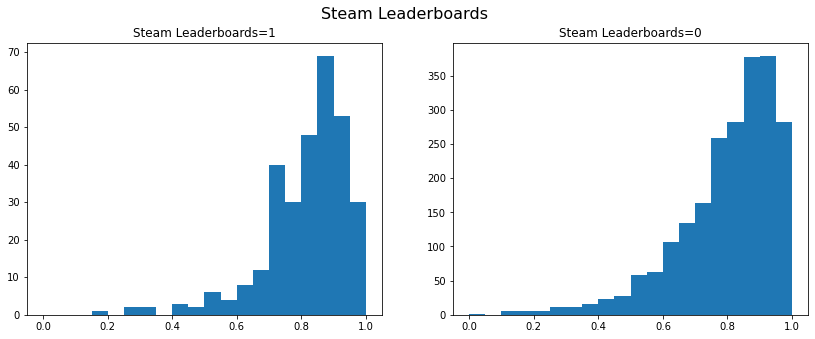

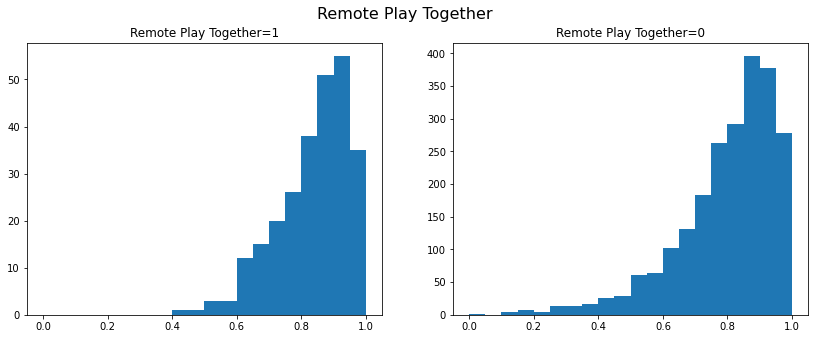

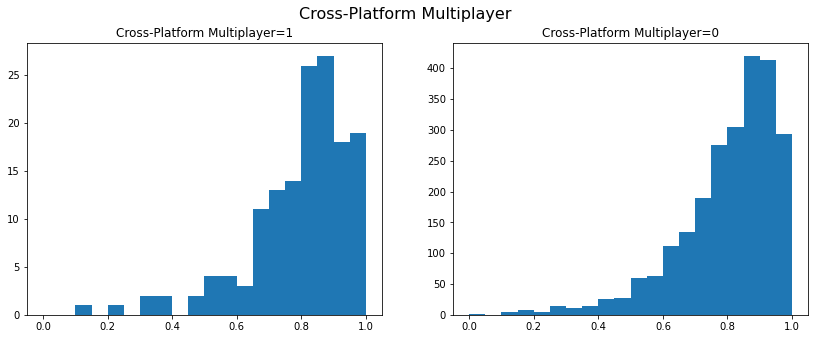

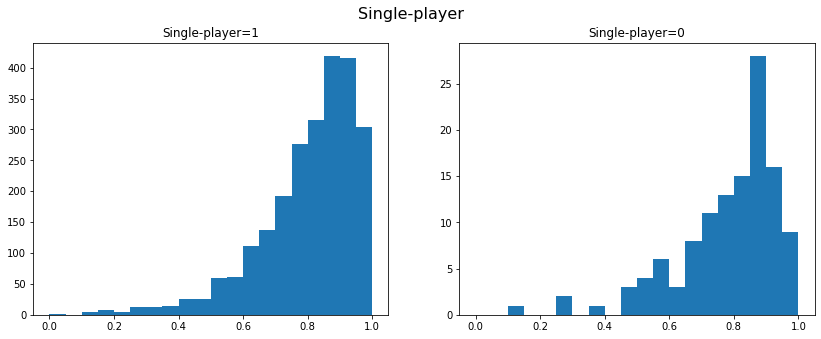

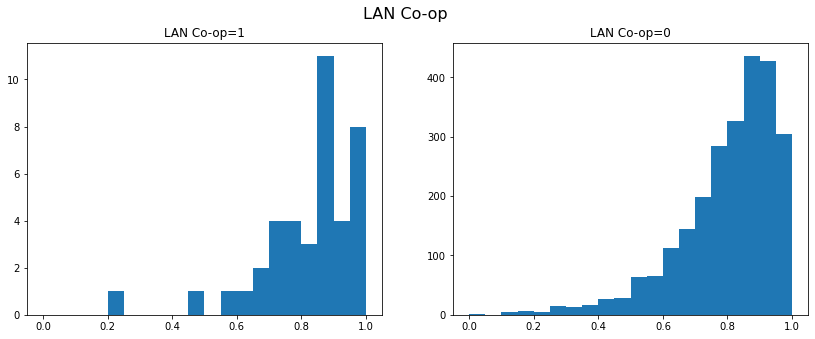

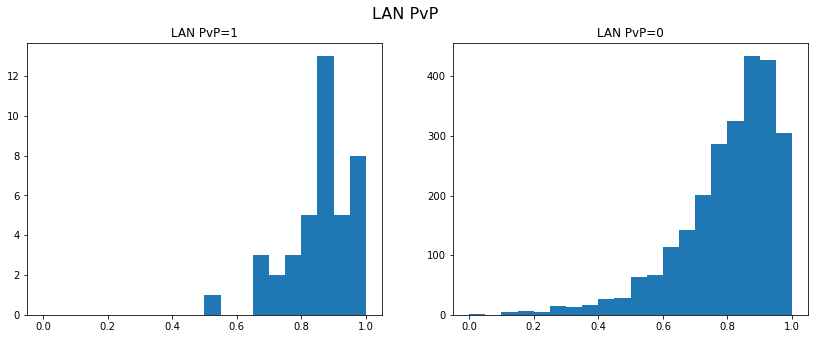

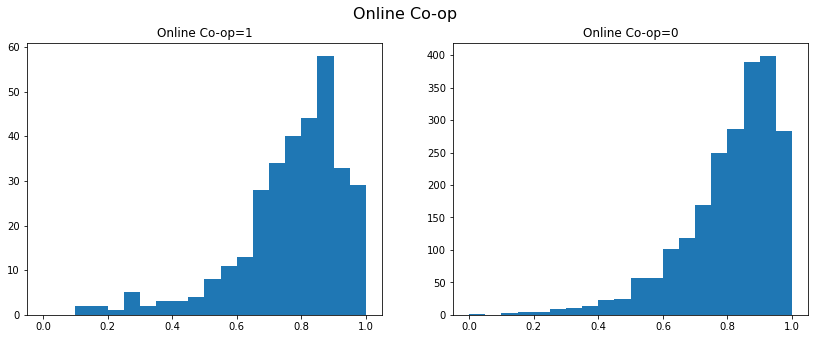

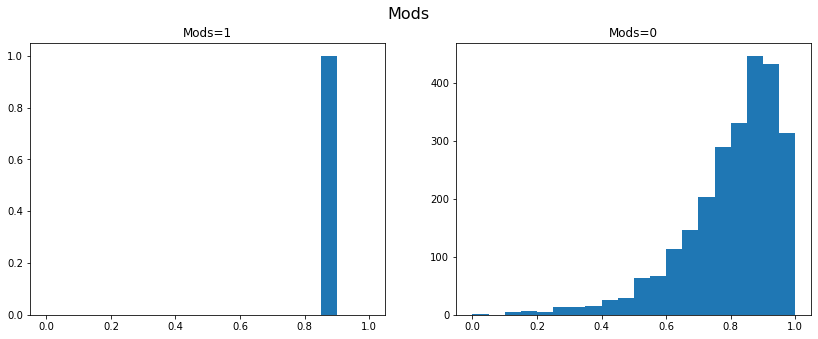

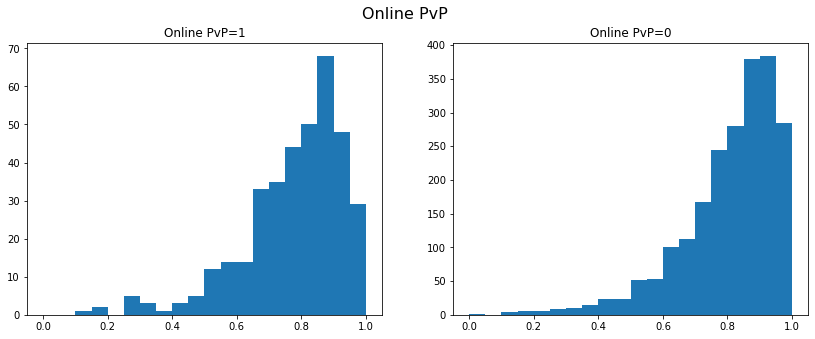

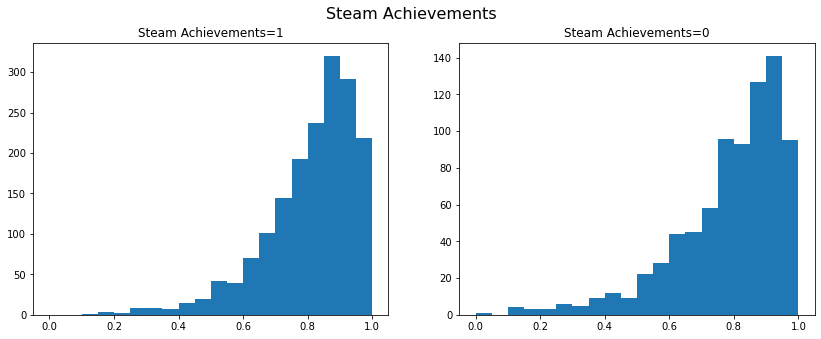

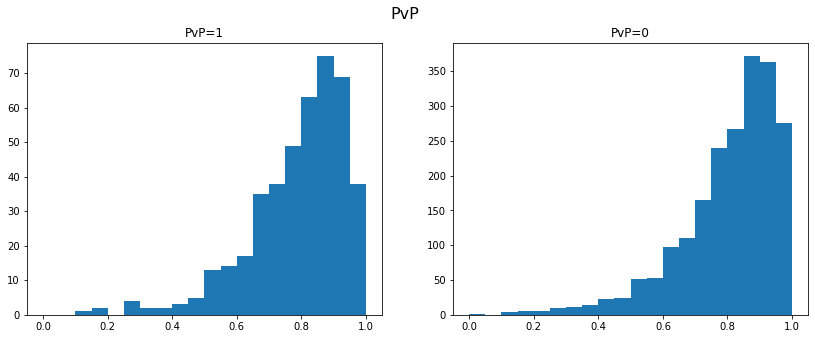

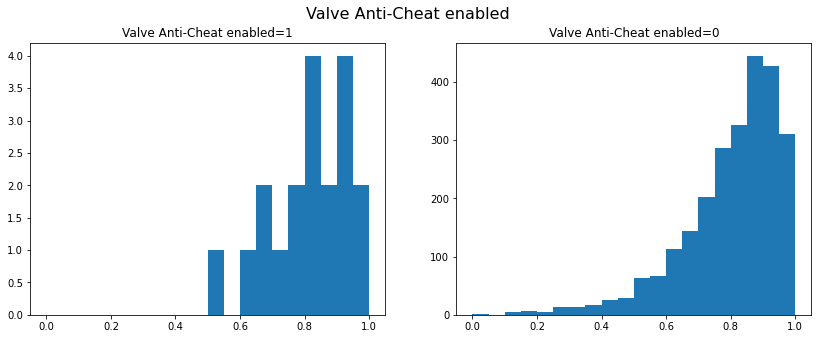

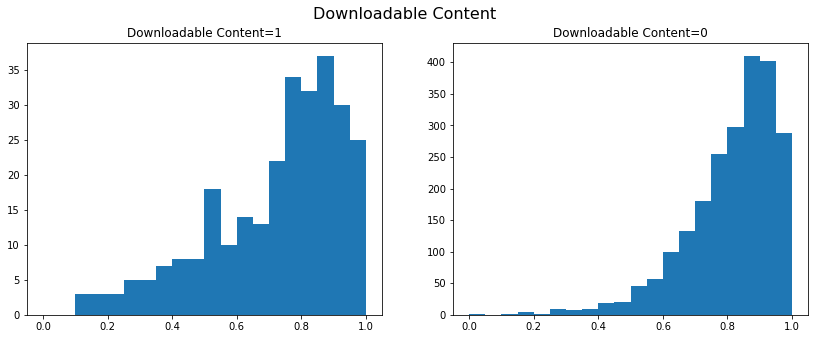

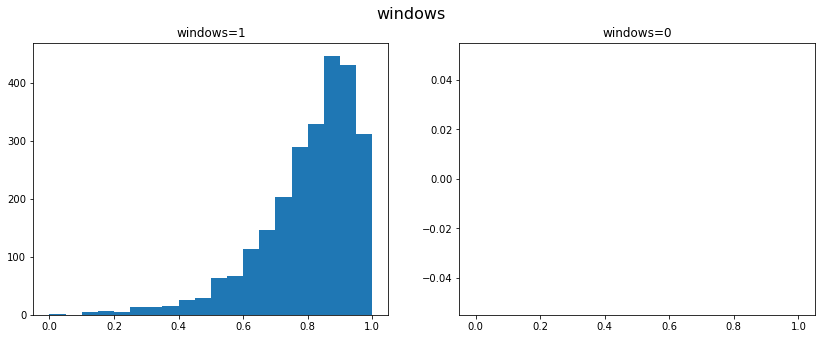

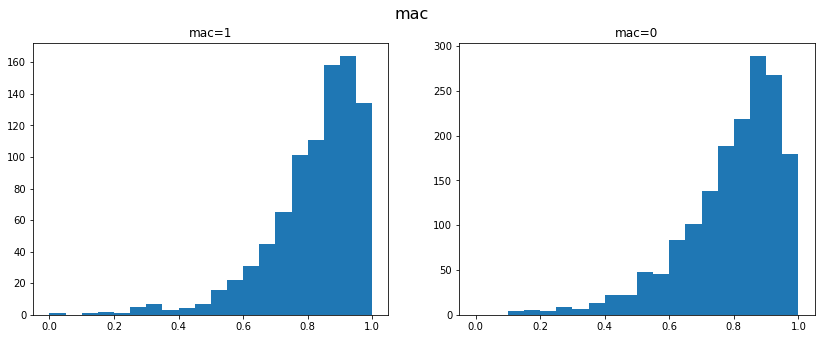

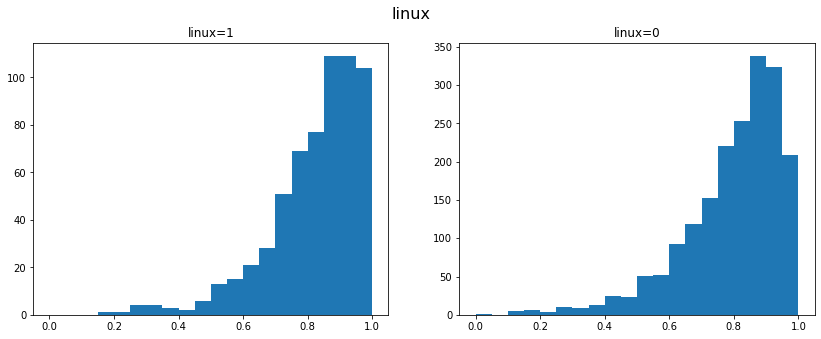

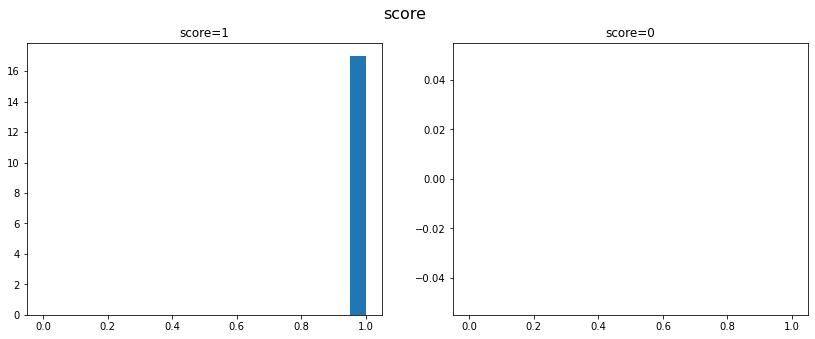

In [104]:
for idx in range(19, len(df.columns)):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
    fig.suptitle(df.columns[idx], fontsize=16)
    ax1.hist(df.loc[df.iloc[:,idx] == 1]["score"],bins)
    ax2.hist(df.loc[df.iloc[:,idx] == 0]["score"],bins)
    ax1.set_title(df.columns[idx]+"=1")
    ax2.set_title(df.columns[idx]+"=0")

comparing train and test set?

At first glance, contrary to our expectation MMOs seem to be rated a bit worse on average. On the other hand PVP games seem to be rated a bit better.

In [ ]:
for indices in H:
    

# try achieving less error with NN